In [1]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
from pylabel import importer

In [2]:
import os
path_to_annotations = "../datasets/HSI/all_rgb.json"
path_to_images = "rgb"

dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="HSI")

dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_segmentation,ann_iscrowd,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,rgb,newrawfile20220220174409.png,,0,696,775,,,152,462,...,[],0,,,,1,ship,,,1
1,rgb,newrawfile20220220174409.png,,0,696,775,,,90,517,...,[],0,,,,1,ship,,,1
2,rgb,newrawfile20220220174409.png,,0,696,775,,,68,440,...,[],0,,,,1,ship,,,1
3,rgb,newrawfile20220220174409.png,,0,696,775,,,85,384,...,[],0,,,,1,ship,,,1
4,rgb,newrawfile20220220174409.png,,0,696,775,,,69,739,...,[],0,,,,1,ship,,,1


In [3]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")

Number of images: 363
Number of classes: 5
Classes:['plane', 'ship', 'tank', 'house', 'store']
Class counts:
house    4589
plane    1800
ship     1355
store     819
tank       95
Name: cat_name, dtype: int64


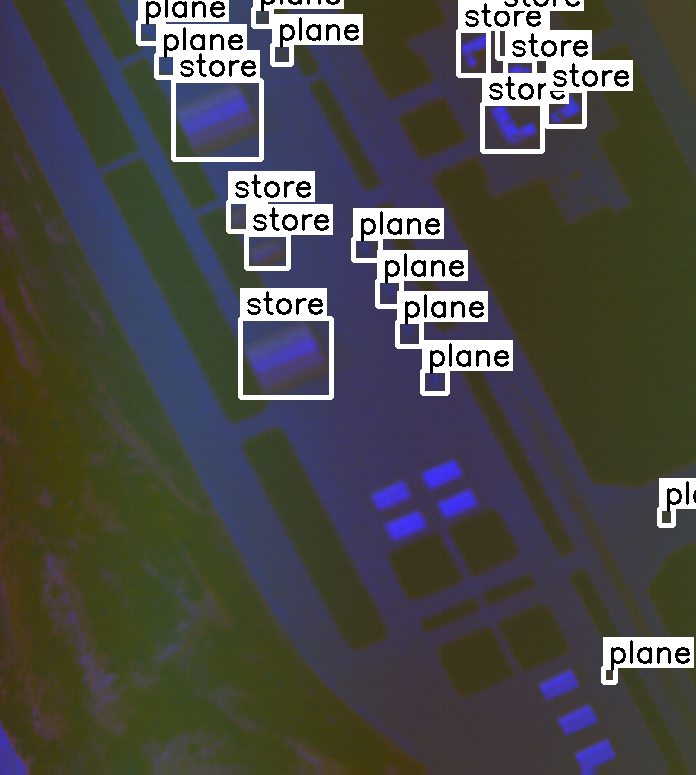

In [4]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))

In [5]:
dataset.splitter.GroupShuffleSplit(train_pct=.8, val_pct=.0, test_pct=.2)
dataset.analyze.ShowClassSplits()

df_train:  6926
df_val:  0
df_test:  1732
df_main:  8658


,all,train,test
cat_name,,,
house,0.530030,0.530898,0.526559
plane,0.207900,0.205746,0.216513
ship,0.156503,0.159544,0.144342
store,0.094595,0.092261,0.103926
tank,0.010973,0.011551,0.008661


In [6]:
dataset.export.ExportToCoco()

['../datasets/HSI/HSI.json']